                                            # Matplotlib Architecture

There are many resources explaining, how to make graphs using Matplotlib  but very few which deal with the underlying architecture and functioning of Matplotlib  under the hood.
Matplotlib consists of three layers:
    1.	Backend Layer
– Deals with the rendering of plots to screen or files
 – In Jupyter notebooks we use the inline backend

    2.	Artist Layer
– Contains containers such as Figure, Subplot, and Axes 
– Contains primitives, such as a Line2D and Rectangle, and collections, such as a   PathCollection

    3. Scripting Layer
– Simplifies access to the Artist and Backend layers

Most of the times we are interfacing with MT via scripting layer to make graphs
These 3 layers can be viewed as Stack. Each layer that sits above another layer is aware of the below layer and knows how to communicate with it, while the bottom layer is not aware of the layers above it.

### Backend Layer
At the bottom of the stack is the backend layer, which provides concrete implementations of the abstract interface classes:<br>
    •	_FigureCanvas_  : encapsulates the concept of a surface to draw onto (e.g. "the paper"). <br>
    •	_Renderer_ : does the drawing (e.g. "the paintbrush"). <br>
    •	_Event_ :  handles user inputs such as keyboard and mouse events. <br>


In [1]:
%matplotlib notebook

In [2]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

_%matplotlib notebook_ :

%matplotlib notebook activates the nbagg backend, which will include a javascript interface for interaction with inline figures in the notebook. 

### _%matplotlib inline_ <br>
activates the inline backend, which renders figures in the notebook as static pngs.

# Artist Layer

1. The Artist hierarchy is the middle layer of the matplotlib stack
2. if _FigureCanvas_ from the backend is the paper, the _Artist_ is the object that knows how to take the _Renderer_ (the paintbrush) and put ink on the canvas.
3.  Everything you see in a matplotlib Figure is an Artist instance; the title, the lines, the tick labels, the images, and so on all correspond to individual Artist instance

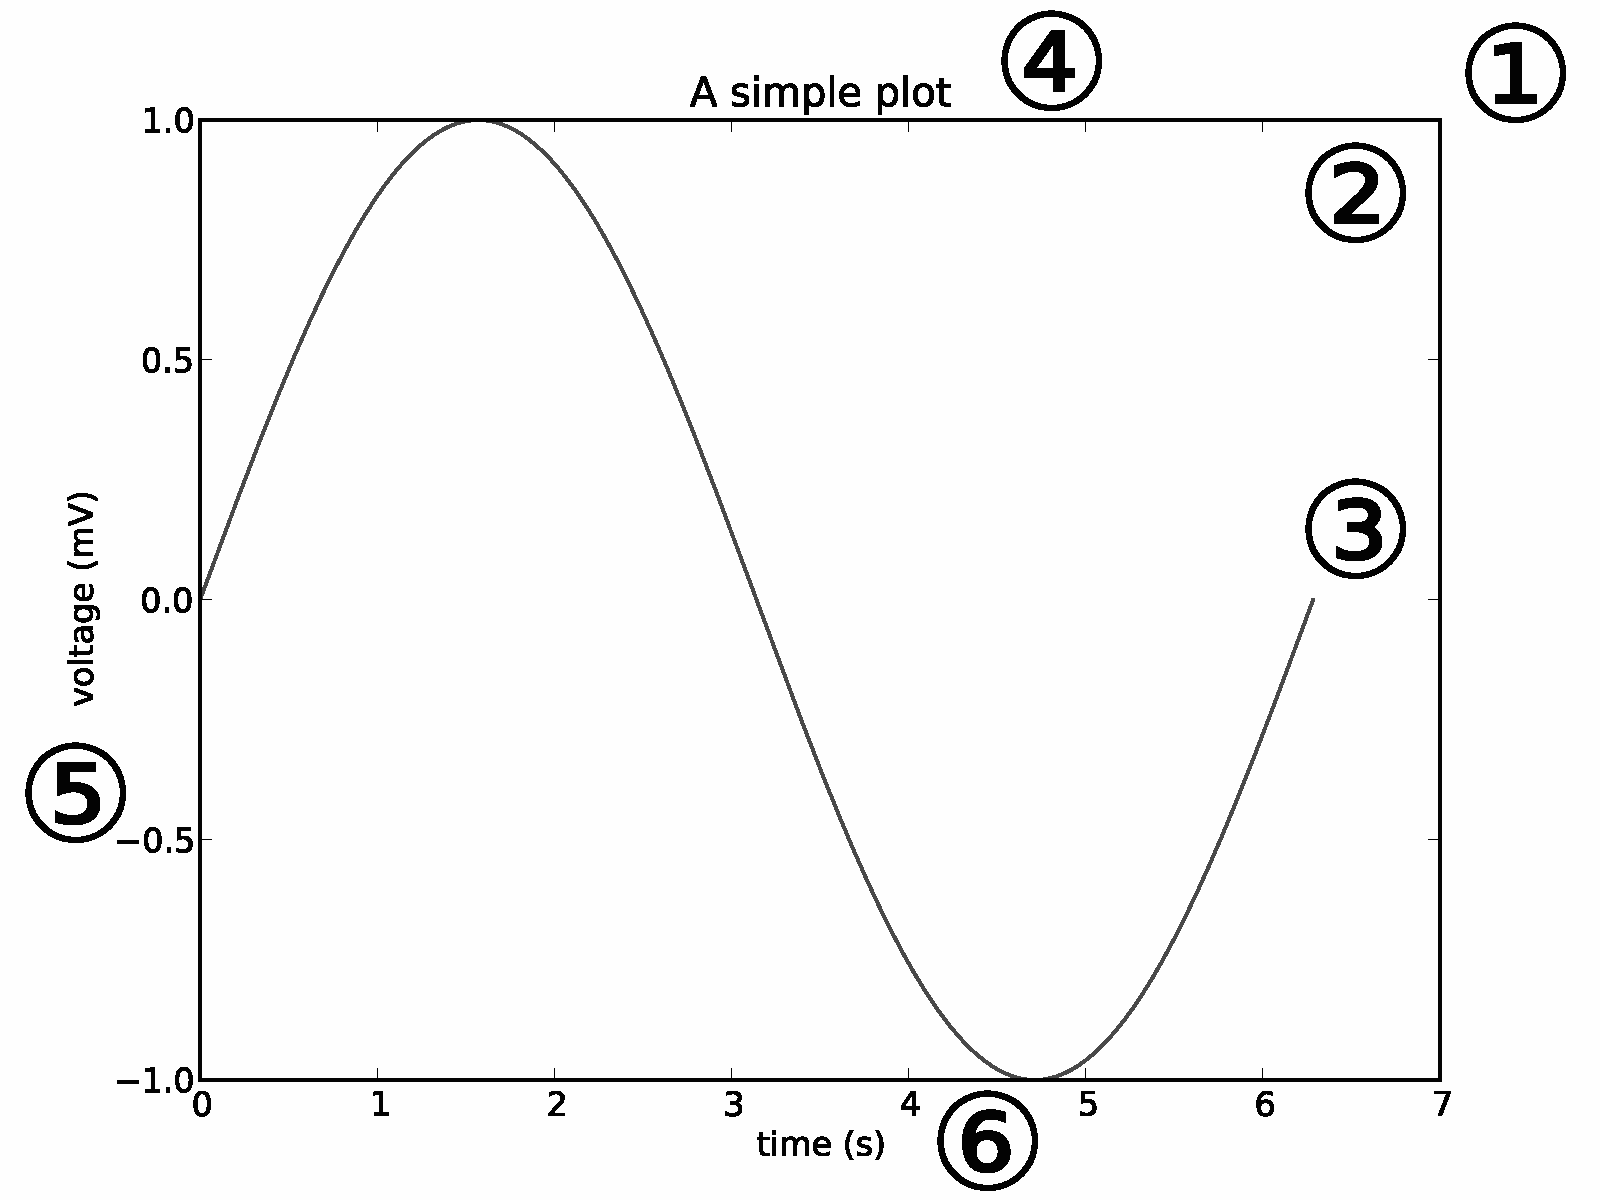

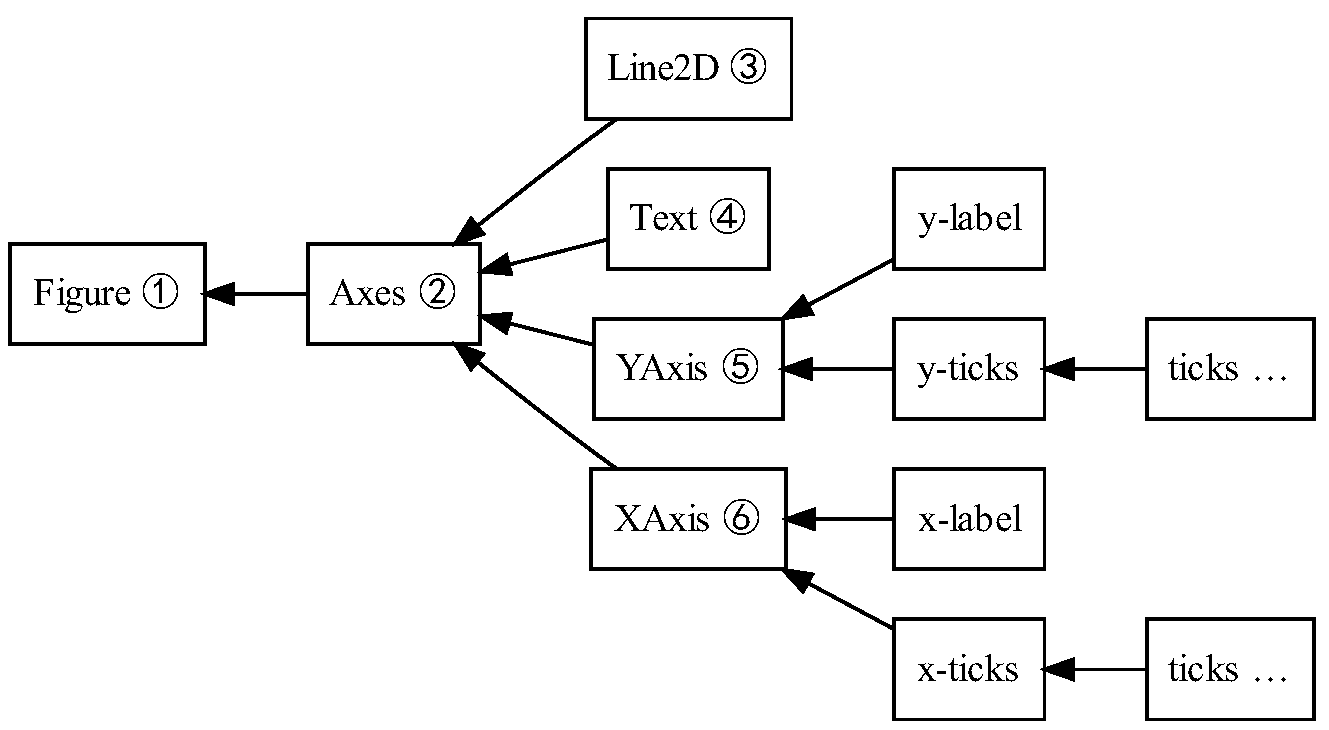

In [4]:
#here we are importing the scripting layer 
import matplotlib.pyplot as plt
plt.plot?

Signature: plt.plot(*args, **kwargs)
Docstring:
Plot lines and/or markers to the
:class:`~matplotlib.axes.Axes`.  *args* is a variable length
argument, allowing for multiple *x*, *y* pairs with an
optional format string.  For example, each of the following is
legal::

    plot(x, y)        # plot x and y using default line style and color
    plot(x, y, 'bo')  # plot x and y using blue circle markers
    plot(y)           # plot y using x as index array 0..N-1
    plot(y, 'r+')     # ditto, but with red plusses

If *x* and/or *y* is 2-dimensional, then the corresponding columns
will be plotted.

If used with labeled data, make sure that the color spec is not
included as an element in data, as otherwise the last case
``plot("v","r", data={"v":..., "r":...)``
can be interpreted as the first case which would do ``plot(v, r)``
using the default line style and color.

If not used with labeled data (i.e., without a data argument),
an arbitrary number of *x*, *y*, *fmt* groups can be specified, as in::

    a.plot(x1, y1, 'g^', x2, y2, 'g-')

Return value is a list of lines that were added.



<IPython.core.display.Javascript object>


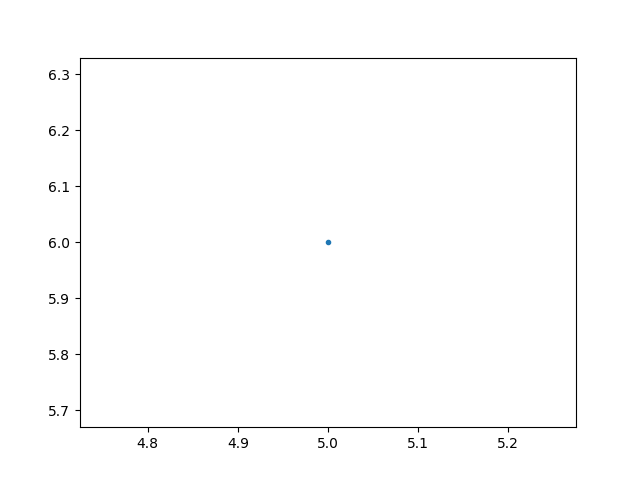

In [7]:
plt.plot(5,6,".")

Will try creating  plot without using the scripting layer

In [8]:
# Set the backend
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

# create a new figure
fig = Figure()

# associate fig with the backend
canvas = FigureCanvasAgg(fig)

# add a subplot to the fig
ax = fig.add_subplot(1,1,1)

# plot the point 
ax.plot(5, 6, '.')

# save the figure to .png

canvas.print_png('test.png')

In [11]:

%%html
<img src='test.png' />

using html magic to display the image as our backend does not permit direct rendering of image.

<IPython.core.display.Javascript object>


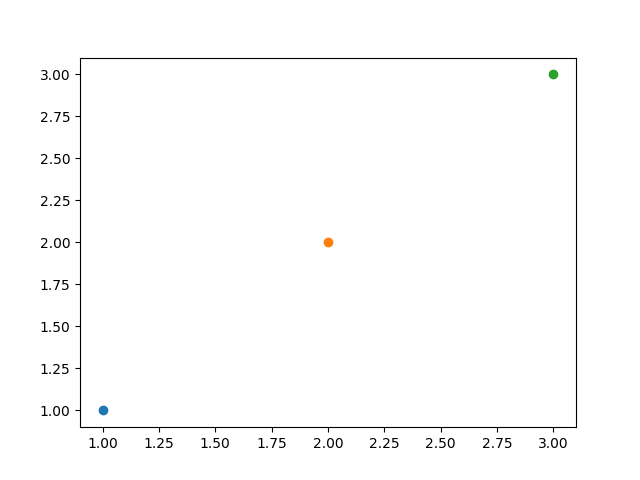

In [13]:
plt.figure()
plt.plot(1,1,'o')
plt.plot(2,2,'o')
plt.plot(3,3,'o')


In [14]:
#we can get the axes object using
ax = plt.gca()
ax.get_children()

plt.gca() returned the axes object 

and by calling get_children we can see the child object contained by axes object

In [18]:
for x in ax.get_children():
    print(x)

Line2D(_line0)
Line2D(_line1)
Line2D(_line2)
Spine
Spine
Spine
Spine
XAxis(80.000000,52.800000)
YAxis(80.000000,52.800000)
Text(0.5,1,'')
Text(0,1,'')
Text(1,1,'')
Rectangle(0,0;1x1)


In [19]:
fig_c = plt.gcf()

In [21]:
for x in fig_c.get_children():
    print(x)

Rectangle(0,0;1x1)
Axes(0.125,0.11;0.775x0.77)
